In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt
import pymc3 as pm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.


In [ ]:
path = "../Data/BrentOilPrices.csv"
data = pd.read_csv(path)
data.shape


(9011, 2)

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data = data.set_index('Date')

# Preprocess the data
data['Price'] = data['Price'].interpolate()

In [ ]:
data.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


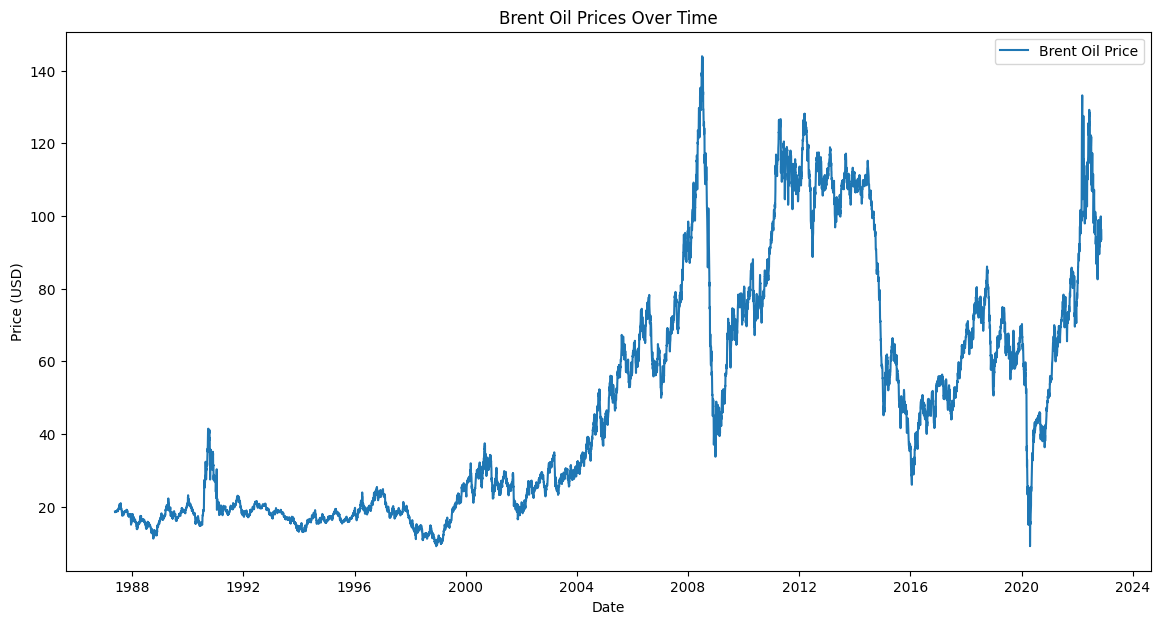

In [ ]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices Over Time')
plt.legend()
plt.show()


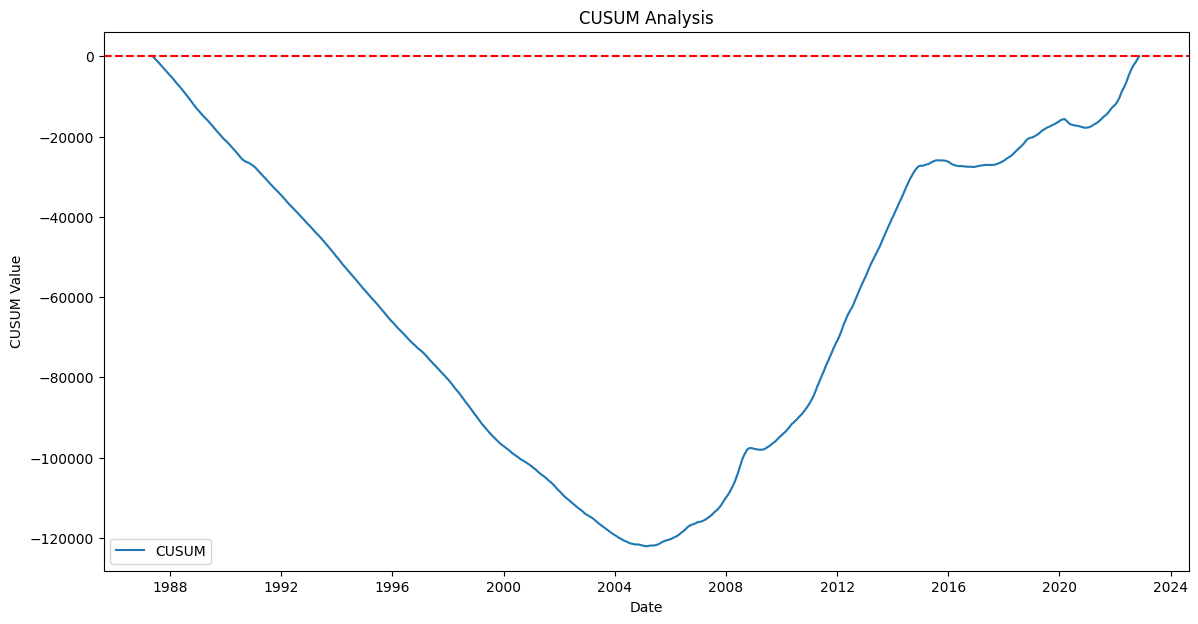

In [ ]:

# CUSUM method
mean_price = data['Price'].mean()
cusum = np.cumsum(data['Price'] - mean_price)
plt.figure(figsize=(14, 7))
plt.plot(data.index, cusum, label='CUSUM')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CUSUM Value')
plt.title('CUSUM Analysis')
plt.legend()
plt.show()

The version of PyMC you are using is very outdated.

Please upgrade to the latest version of PyMC https://www.pymc.io/projects/docs/en/stable/installation.html

Also notice that PyMC3 has been renamed to PyMC.
/home/kerod/Desktop/KAIM/week_10/weeK_10/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>NUTS: [mean_prior]
>Metropolis: [change_point]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.
The number of effective samples is smaller than 25% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/kerod/Desktop/KAIM/week_10/weeK_10/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


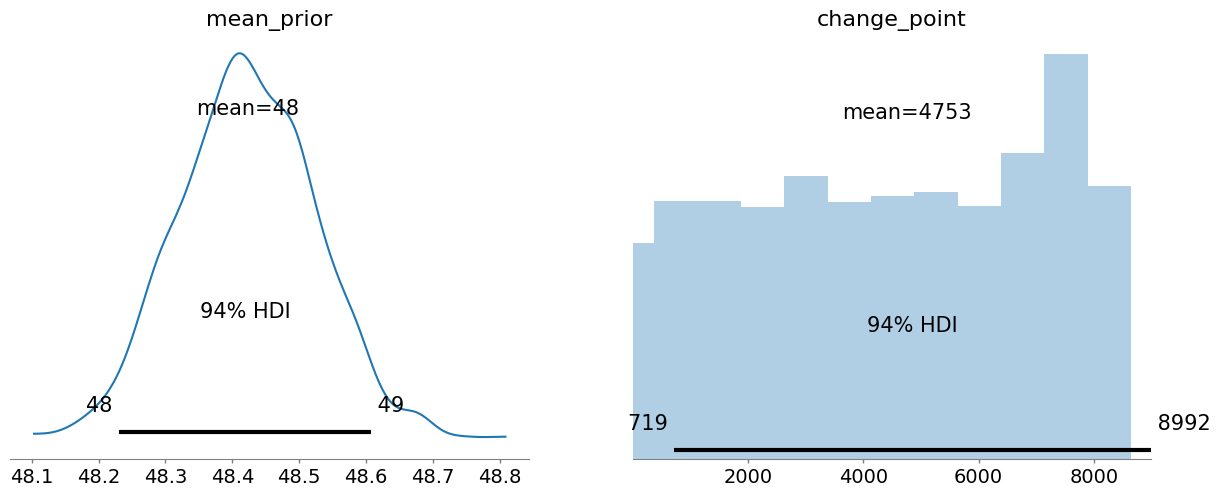

In [ ]:

# Bayesian Change Point Detection using PyMC3
with pm.Model() as model:
    # Priors
    mean_prior = pm.Normal('mean_prior', mu=mean_price, sigma=10)
    change_point = pm.DiscreteUniform('change_point', lower=0, upper=len(data)-1)

    # Likelihood
    likelihood = pm.Normal('likelihood', mu=mean_prior, sigma=10, observed=data['Price'])

    # Inference
    trace = pm.sample(1000, tune=1000, cores=2)

# Plot results
pm.plot_posterior(trace)
plt.show()


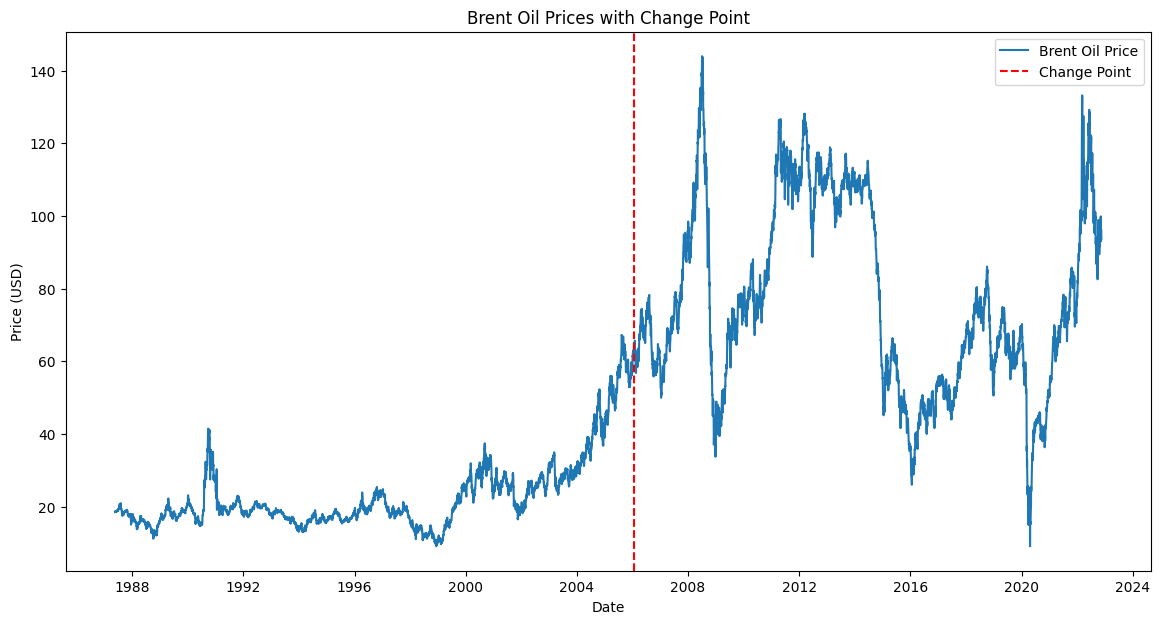

In [ ]:
change_point_index = 4753

# Plot the data with the change point
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
plt.axvline(x=data.index[change_point_index], color='red', linestyle='--', label='Change Point')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Change Point')
plt.legend()
plt.show()


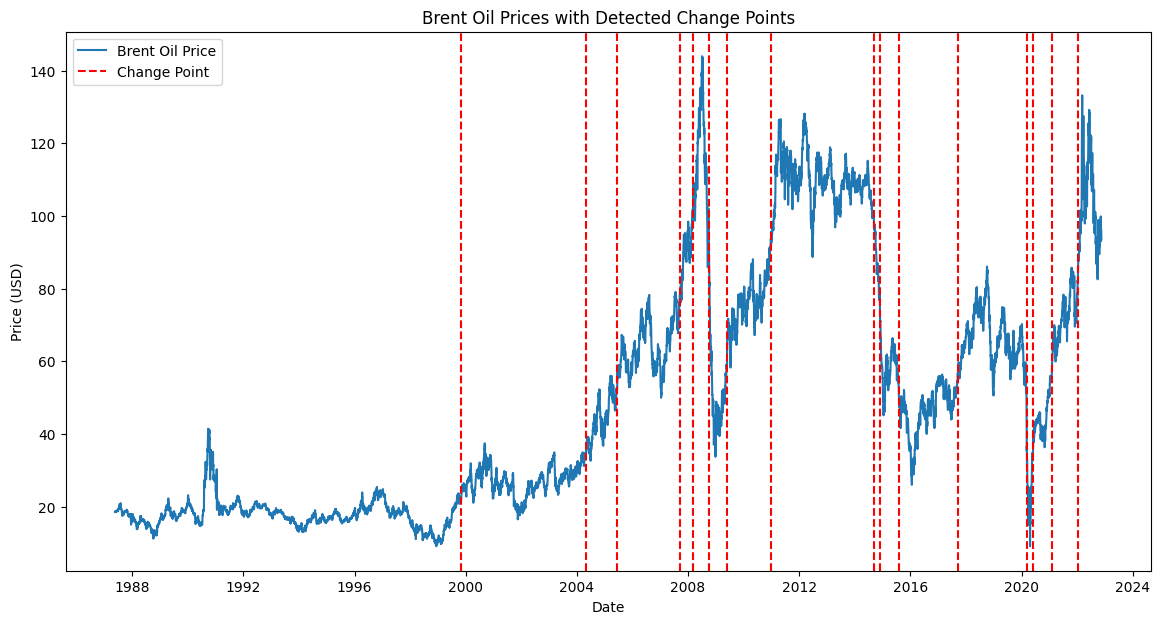

In [ ]:
price_array = data['Price'].values
model = "rbf"
algo = rpt.Pelt(model=model).fit(price_array)
change_points = algo.predict(pen=20)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
for cp in change_points[:-1]:
    plt.axvline(x=data.index[cp], color='red', linestyle='--', label='Change Point' if cp == change_points[0] else "")
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Prices with Detected Change Points')
plt.legend()
plt.show()